In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_feather('/content/census_income.feather')
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over_50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  over_50k        32560 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 3.5+ MB


In [4]:
y = df['over_50k']
X = df.drop(['over_50k'], axis=1)

In [5]:
y.value_counts()

False    24719
True      7841
Name: over_50k, dtype: int64

In [6]:
classes = y.unique()

In [7]:
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [8]:
num_columns = [col for col in X.columns if col not in cat_columns]
num_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

### Encoding categorical data

In [9]:
encoder = OrdinalEncoder()
X[cat_columns] = encoder.fit_transform(X[cat_columns])
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0


### Encoding numetical data to category in bins

In [10]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
X[num_columns] = discretizer.fit_transform(X[num_columns])
X

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,4.0,6.0,0.0,9.0,3.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,39.0
1,2.0,4.0,3.0,11.0,1.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,2.0,39.0
2,4.0,4.0,3.0,1.0,0.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,2.0,39.0
3,1.0,4.0,4.0,9.0,3.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,2.0,5.0
4,2.0,4.0,4.0,12.0,3.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,2.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1.0,4.0,3.0,7.0,2.0,2.0,13.0,5.0,4.0,0.0,0.0,0.0,1.0,39.0
32556,2.0,4.0,1.0,11.0,1.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,2.0,39.0
32557,4.0,4.0,1.0,11.0,1.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,2.0,39.0
32558,0.0,4.0,3.0,11.0,1.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,39.0


### LogisticRegression

In [ ]:
# Stratify

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [ ]:
model = LogisticRegression(random_state=30, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=30)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_lr_strat = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_lr_strat, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.807535,0.648404,0.438701,0.523327
test,0.808722,0.649149,0.447449,0.529749


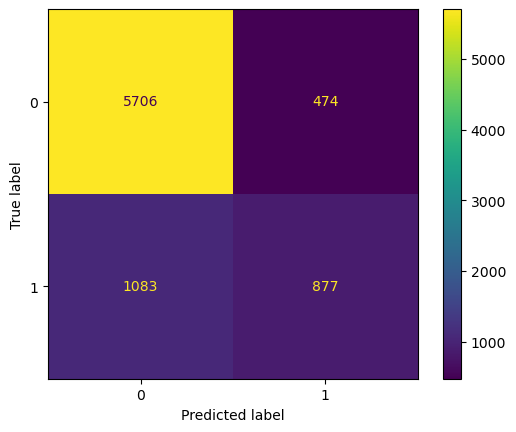

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

In [ ]:
# No stratify

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
model = LogisticRegression(random_state=30, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=30)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_lr_NoStrat = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_lr_NoStrat, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.808108,0.649615,0.444067,0.527526
test,0.809951,0.649149,0.449744,0.531354


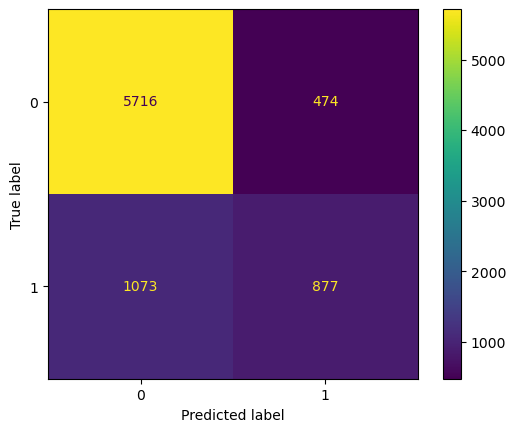

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### Logaritmic Regression GridSearch

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
param_to_find_from = {
    'C': np.linspace(0.1,100,50),
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear']
}
lr_model = LogisticRegression(max_iter=10000)
gs = GridSearchCV(lr_model, param_to_find_from, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.9918...
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             verbose=1)

In [ ]:
print('best_params_lr ',gs.best_params_)
print('best_score_lr ', gs.best_score_)

best_params_lr  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
best_score_lr  0.8080262080262081


In [ ]:
lr_model = LogisticRegression(**gs.best_params_, max_iter= 10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_lr_BestVal = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_lr_BestVal, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.808600,0.652544,0.44186,0.526923
test,0.808845,0.647455,0.44359,0.526476


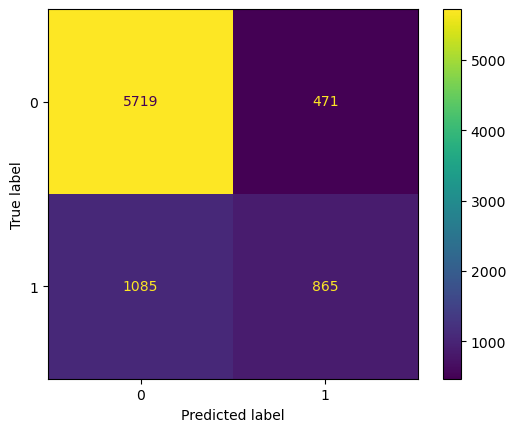

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### KNN classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
param_to_find = {
    'n_neighbors': list(range(1,100))
}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_to_find, verbose = 1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=1)

In [ ]:
print('best_params_lr ',gs.best_params_)
print('best_score_lr ', gs.best_score_)

best_params_lr  {'n_neighbors': 14}
best_score_lr  0.823054873054873


In [ ]:
knn_model = KNeighborsClassifier(**gs.best_params_)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_knn = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_knn, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.844758,0.733437,0.560007,0.635095
test,0.823710,0.667099,0.527179,0.588943


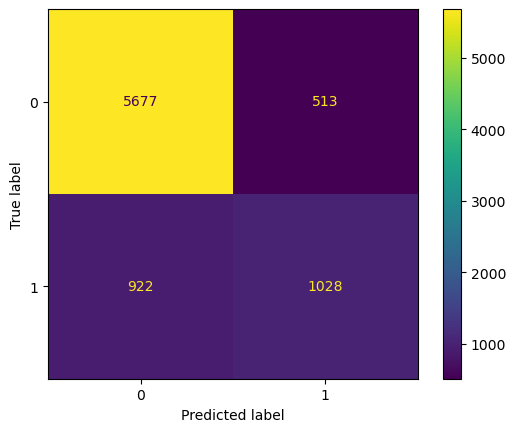

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### SVM classifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
param_to_find = {
    'C': np.linspace(0.1, 100, 4),
    'gamma': np.linspace(0.0001, 1, 4),
    'kernel': ['rbf', 'linear']
}
svm = SVC()
gs = GridSearchCV(svm, param_to_find, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
print('best_params_lr ',gs.best_params_)
print('best_score_lr ', gs.best_score_)

In [ ]:
svm_model = SVC(**gs.best_params_)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_svm = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_svm, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### NaiveBias

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
model = CategoricalNB()
model.fit(X_train, y_train)
f1_score(model.predict(X_test), y_test)

0.6496591159005938

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
f1_score(model.predict(X_test), y_test)

0.579743888242142

### Bagging

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
bc = BaggingClassifier(estimator=CategoricalNB())
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
y_pred_train = bc.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_bagging = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_bagging, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.808886,0.578724,0.763707,0.658471
test,0.804300,0.569213,0.752821,0.648267


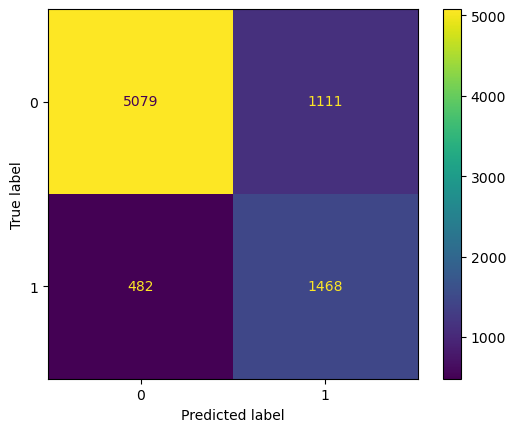

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1]).plot()

### Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [ ]:
abc = AdaBoostClassifier(estimator=CategoricalNB())
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
y_pred_train = abc.predict(X_train)

In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label=True)
recall_train = recall_score(y_train, y_pred_train, pos_label=True)
f1_train = f1_score(y_train, y_pred_train, pos_label=True)

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label=True)
recall_test = recall_score(y_test, y_pred, pos_label=True)
f1_test = f1_score(y_test, y_pred, pos_label=True)

In [ ]:
df_dict_abc = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict_abc, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
df

,accuracy,precision,recall,f1
train,0.824488,0.616592,0.720421,0.664475
test,0.824079,0.612707,0.722051,0.662900


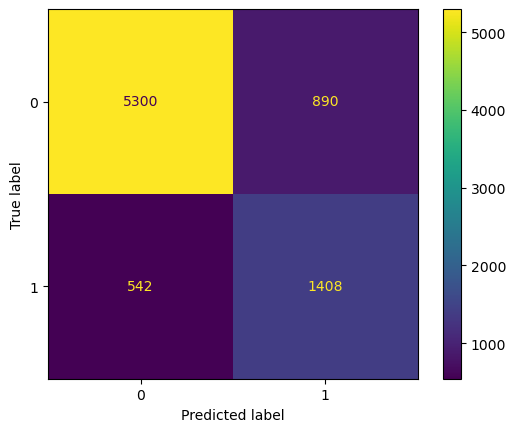

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1]).plot()